In [107]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from fetch_raw import create_connection
from pre_process import check_categories, top_n_hitRate, shows_at_cities_of_all_categories
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [108]:
# Create connection with database on aws
cnx = create_connection()

In [109]:
df = top_n_hitRate(cnx, 100)
df

,title,hitRate,category,webSales,sourceWebPromote,numShows,masterUnit,startDate,endDate
0,繆斯的雕刻刀─典藏石雕特展,35039,6,,,1,None,2020-01-05,2021-12-31
1,趴趴熊親子電影院(12月4場),18513,8,,,1,臺中市立圖書館霧峰以文分館,2021-12-01,2021-12-31
2,Virtual Art Street 全新線上藝術體驗展,17010,4,,https://www.vart-street.com/,4,Virtual Art Street,2021-01-09,2021-12-31
3,半熟新工藝－持續探索生活的樣態,15813,6,,https://mom.maison-objet.com/en/brand/13914/lu...,1,國立臺灣工藝研究發展中心,2021-01-01,2021-12-31
4,洶湧的溫柔——臺灣大河小說捐贈展,9061,6,https://event.culture.tw/NMTL/portal/Registrat...,https://event.culture.tw/NMTL,1,國立台灣文學館,2021-07-27,2022-04-10
5,第四特展室：典藏客家-經典館藏常設展,5041,6,,https://www.facebook.com/hakkapark,1,客家委員會客家文化發展中心,2021-01-01,2021-12-31
6,織塑巧色樂-臺灣工藝技法與創作展,4869,6,,https://tcce.1916.org.tw/,1,文化部文化資產局,2021-08-15,2021-12-31
7,2020新響藝術季-西元二〇七〇-新竹回憶錄,4812,6,,www.hchcc.gov.tw,1,新竹縣政府,2021-01-01,2021-12-31
8,漁業文物展,4141,6,,http://www.bocach.gov.tw/subject/culture/main....,1,彰化區漁會,2021-01-01,2021-12-31
9,原．未─原住民工藝的未來式,3561,6,https://event.culture.tw/NTCRI/portal/Registra...,https://event.culture.tw/NTCRI,1,國立台灣工藝研究發展中心,2021-08-01,2021-12-31


In [88]:
num_categories = check_categories(cnx)
print(num_categories)
tmp = {}
for index, row in num_categories.iterrows():
    tmp[row['category']] = {'numCategory': row['numCategory'], '類別': row['類別']}
num_categories = tmp
cat_count = dict.fromkeys(sorted(set(df['category'])), 0)
for cat in df['category']:
    cat_count[cat] += 1

tmp = []
for k, v in cat_count.items():
    tmp.append({'category': k, 'count of top n': v, 'total': num_categories[k]['numCategory'],
     'ratio (%)': v / num_categories[k]['numCategory'] * 100, '類別': num_categories[k]['類別']})
cat_count = tmp


    category  numCategory    類別
0          1          295    音樂
1          2          143    戲曲
2          3           66    舞蹈
3          4           50    親子
4          5           20  獨立音樂
5          6         1894    展覽
6          7          397    講座
7          8          191    電影
8         11           28    綜藝
9         13           30    競賽
10        14            2    徵選
11        15          101    其他
12        16           62  研習課程
13        17           58   演唱會


In [37]:
pd.DataFrame(cat_count)

,category,count of top n,total,ratio (%),類別
0,2,1,143,0.699301,戲曲
1,4,10,50,20.000000,親子
2,6,61,1894,3.220697,展覽
3,7,3,397,0.755668,講座
4,8,3,191,1.570681,電影
5,15,8,101,7.920792,其他
6,17,14,58,24.137931,演唱會


# 點擊率前一百高的活動
點擊率最高的前100個活動，**6** (展覽) 的數量最多，但就比例上而言，**17** (演唱會)和 **4** (親子)最為突出。\
在主題方面，「展覽」多以台灣本土文化、民俗文物等，如「繆斯的雕刻刀─典藏石雕特展」、「織塑巧色樂-臺灣工藝技法與創作展」、「漁業文物展」。\
「親子」與「演唱會」亦大同小異，近年來皆多以本土作為賣點。

In [45]:
shows_count = shows_at_cities_of_all_categories(cnx)
pd.DataFrame(shows_count)

,臺北市,新北市,基隆市,桃園市,新竹縣,新竹市,苗栗縣,臺中市,南投縣,彰化縣,雲林縣,嘉義縣,嘉義市,臺南市,高雄市,屏東縣,宜蘭縣,花蓮縣,臺東縣,澎湖縣,金門縣,連江縣,線上
1,99,23,1,24,3,3,13,46,17,4,2,1,0,37,68,8,0,0,1,0,0,1,1
2,210,9,0,11,9,8,4,50,13,7,2,3,8,14,33,26,1,0,0,0,0,0,303
3,47,3,0,3,0,0,3,26,9,3,0,1,0,4,9,13,0,1,2,0,0,0,1
4,187,17,0,5,0,7,0,28,2,3,0,7,0,5,10,1,1,0,0,0,0,0,4
5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,196,418,17,126,22,7,61,244,78,146,20,5,0,262,175,34,27,19,3,16,4,4,8
7,125,60,2,45,15,0,1,78,14,8,0,0,2,31,60,6,4,2,1,2,1,0,0
8,3,73,0,18,0,0,1,24,15,2,0,0,0,25,25,2,1,1,0,2,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<ipython-input-106-aea9f650b878>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 15))


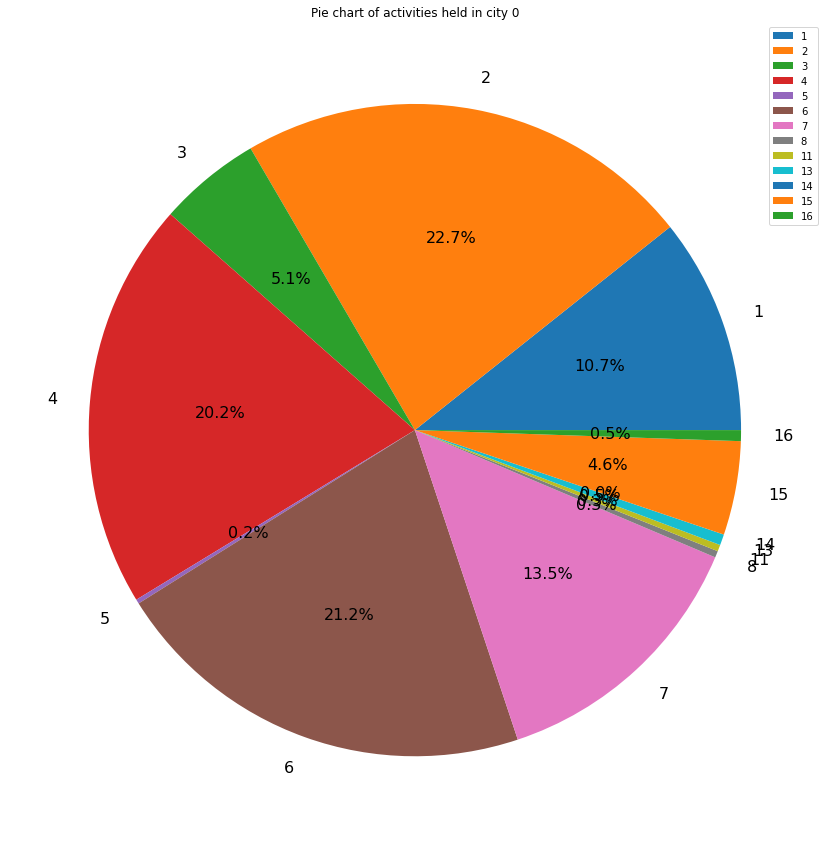

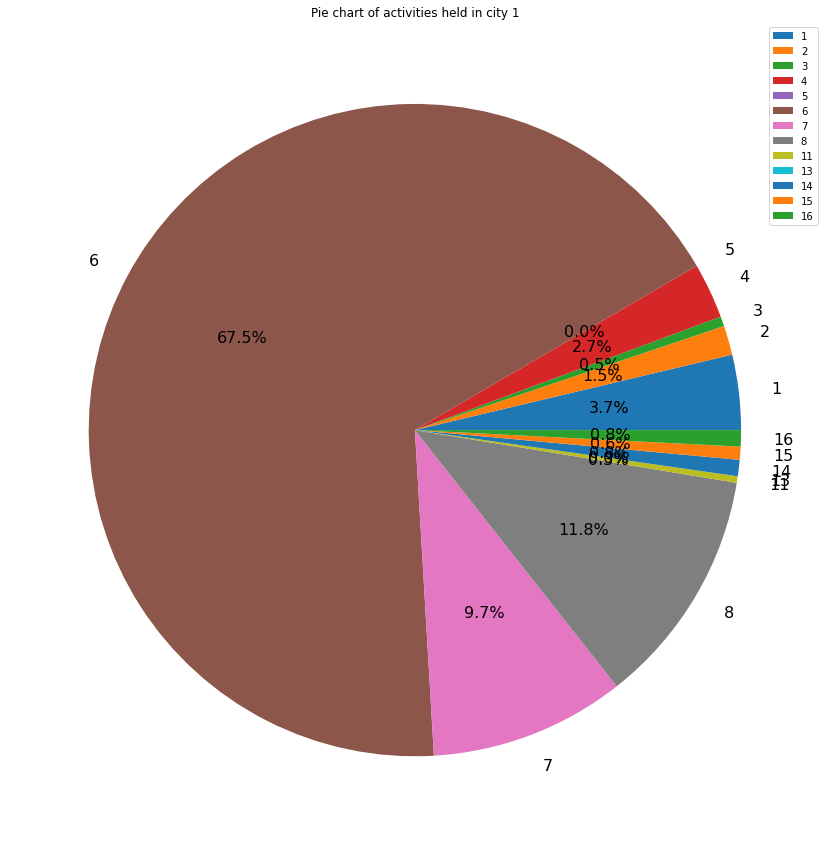

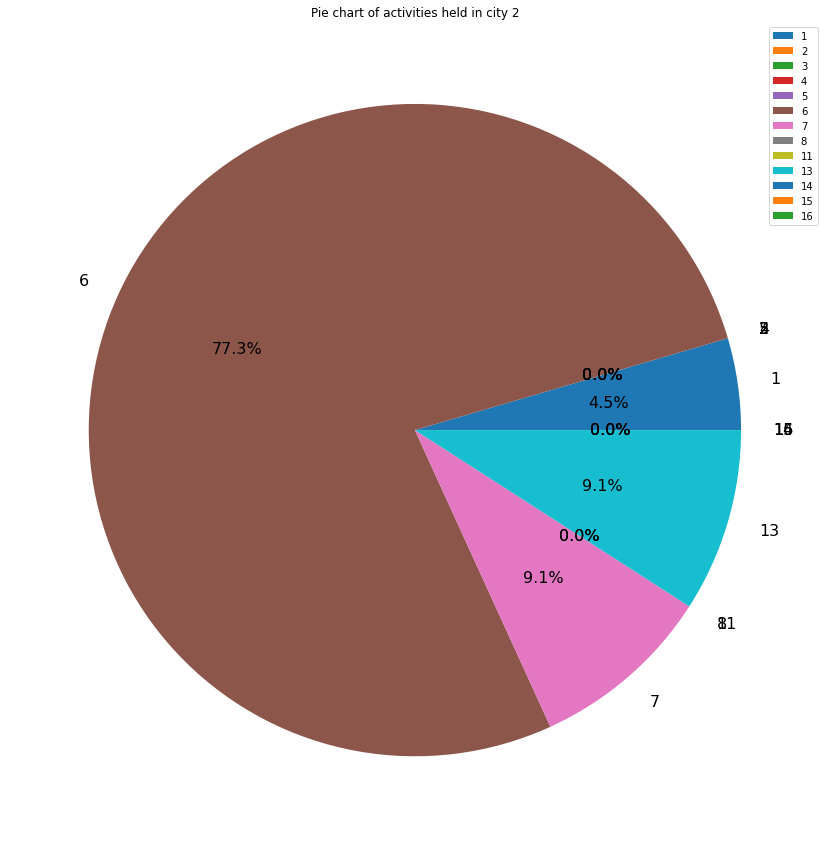

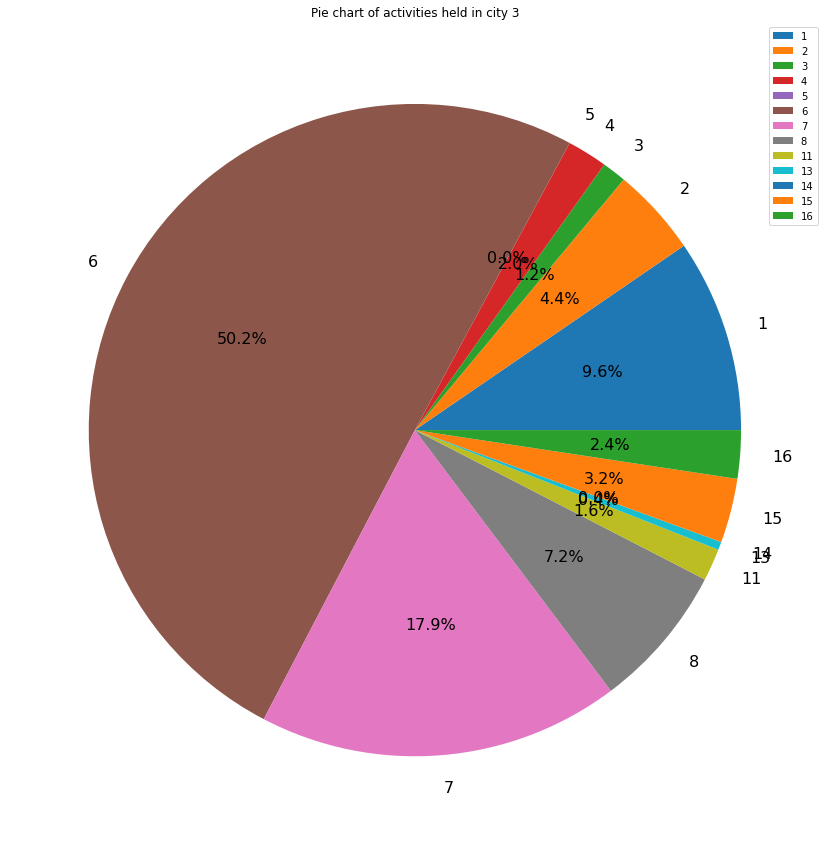

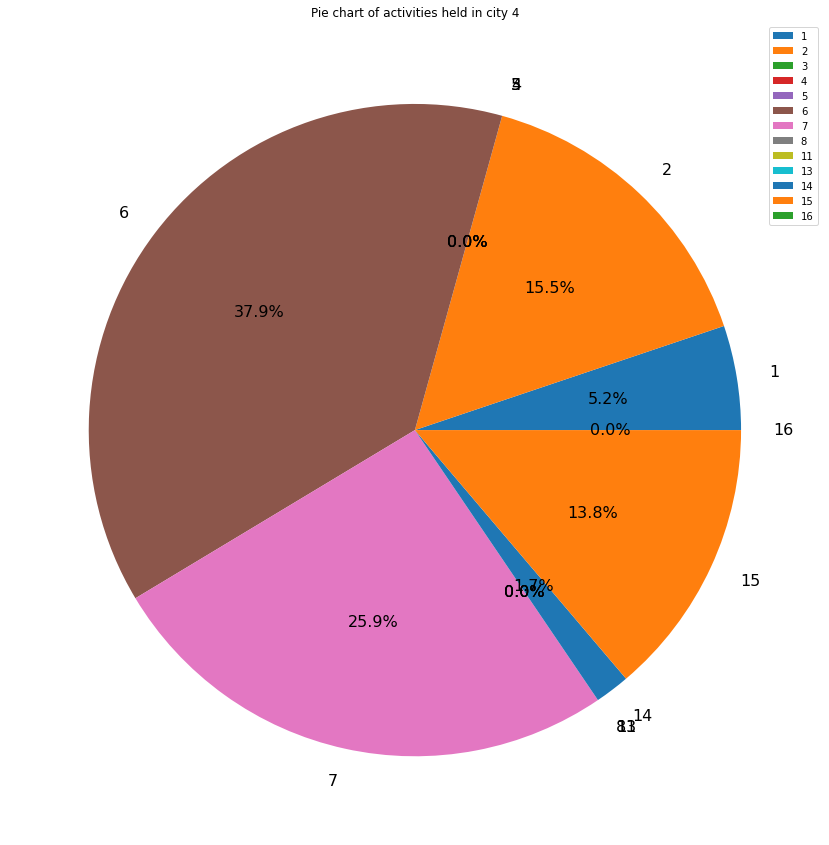

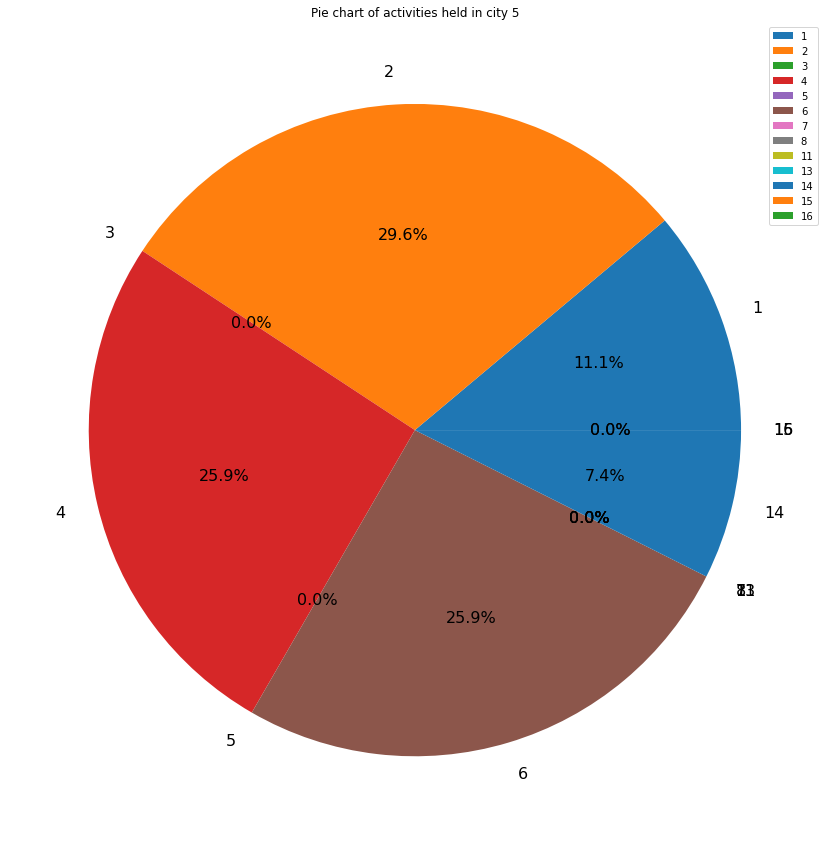

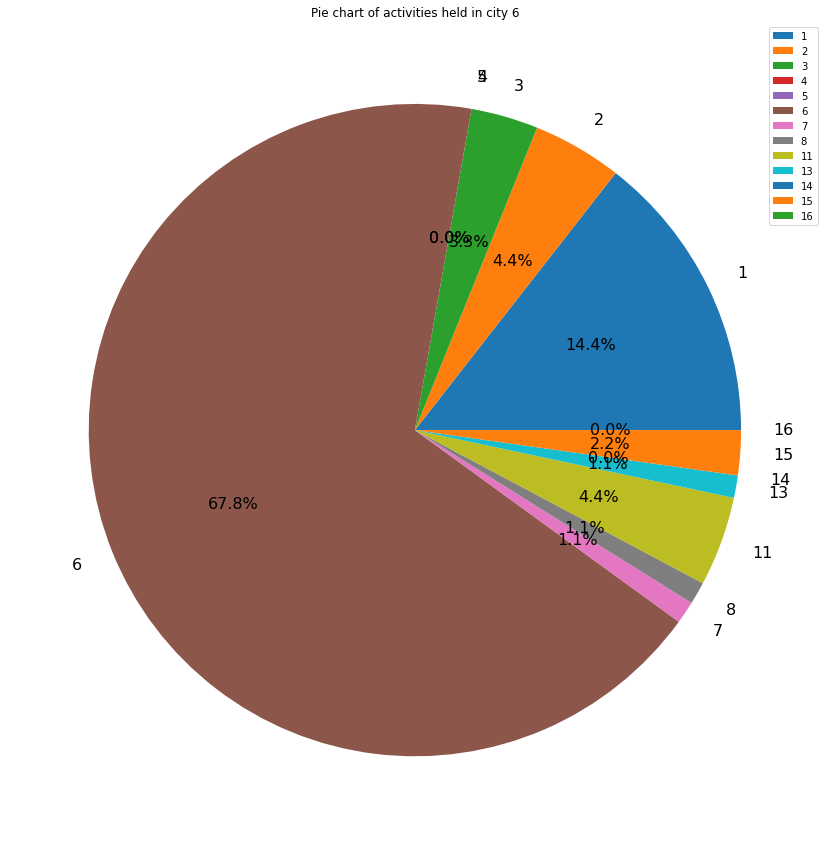

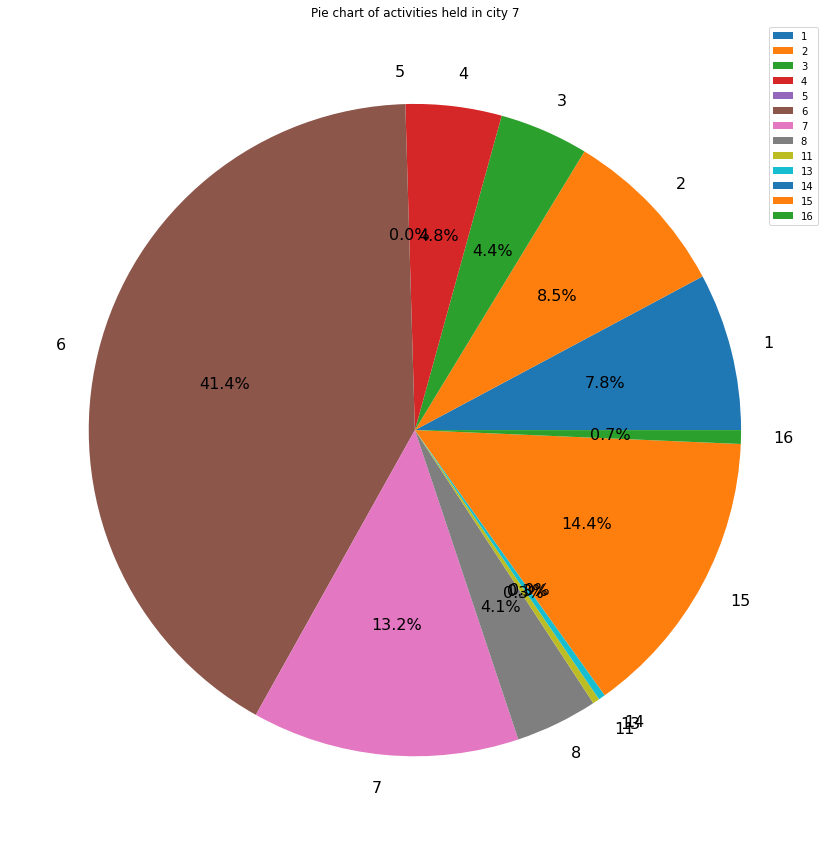

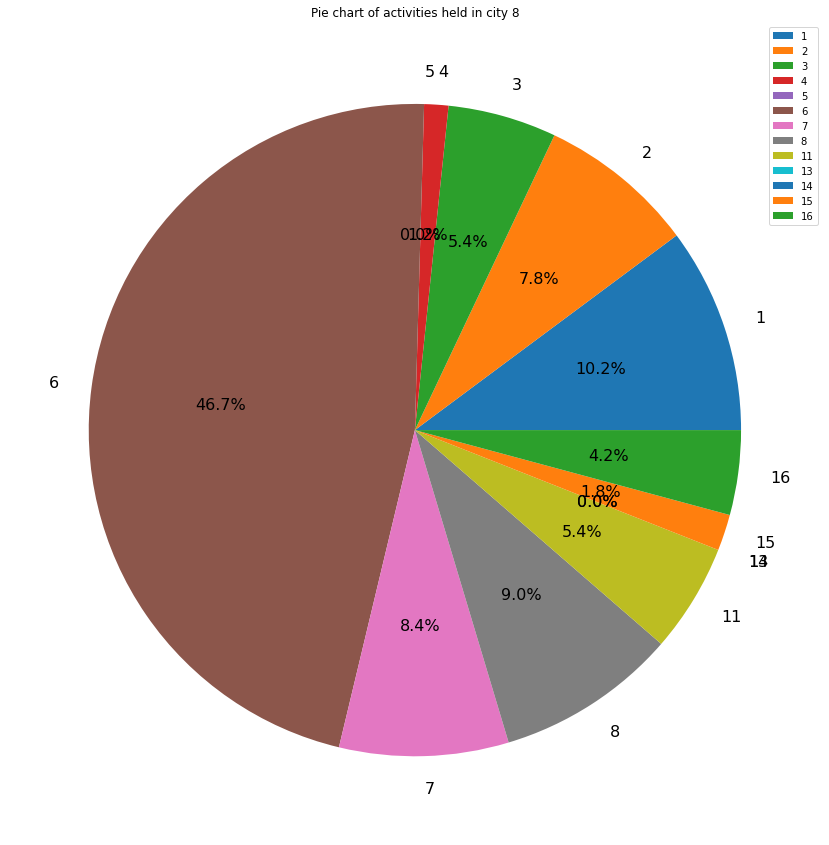

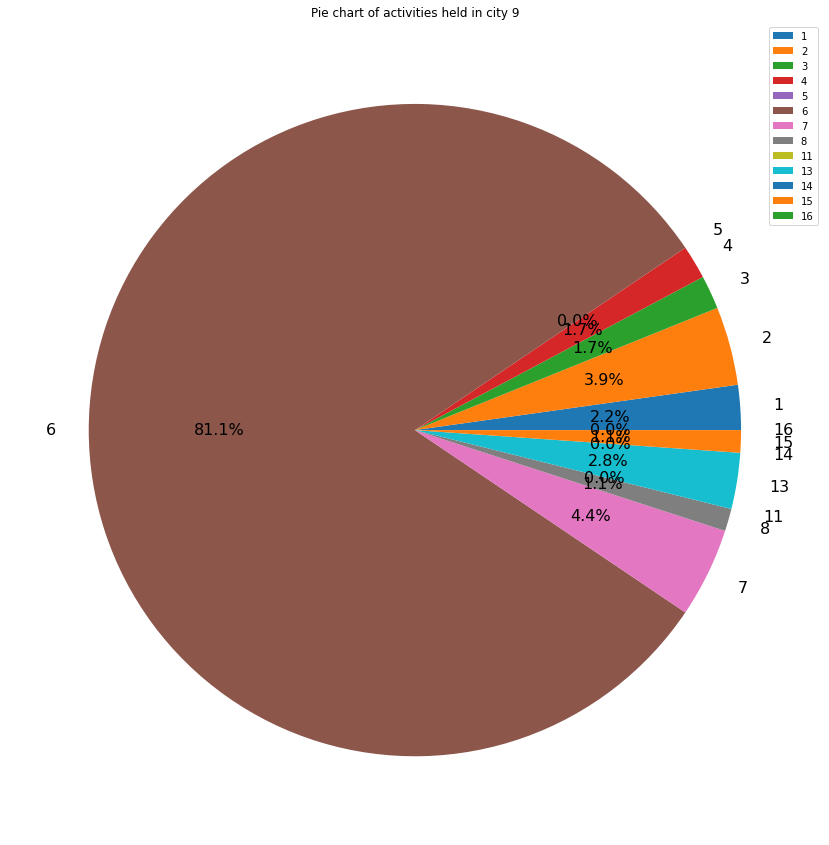

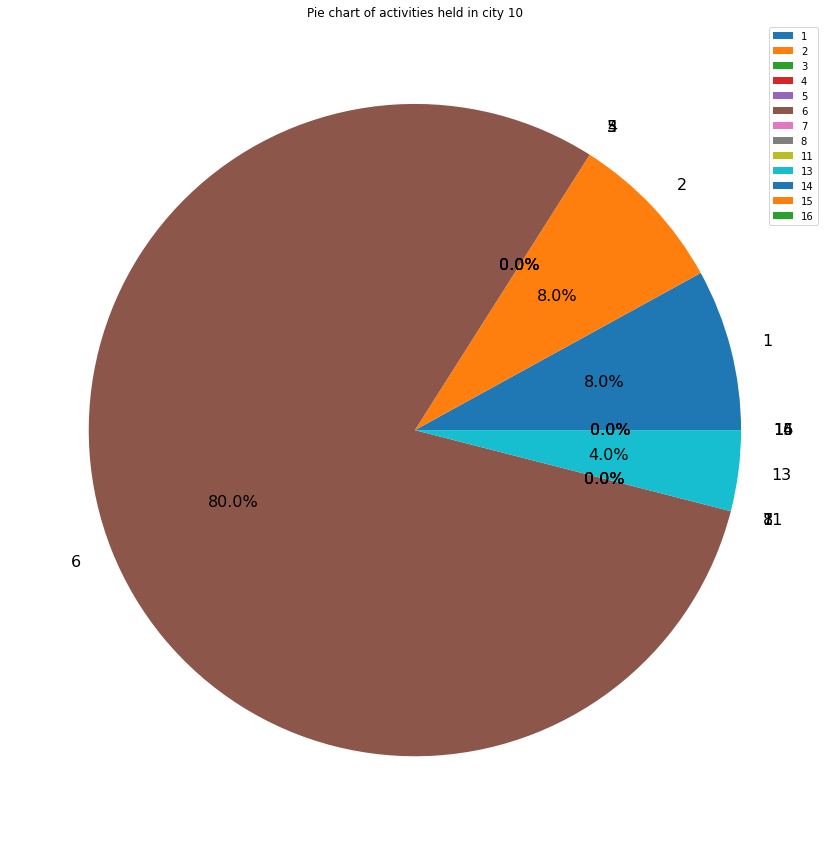

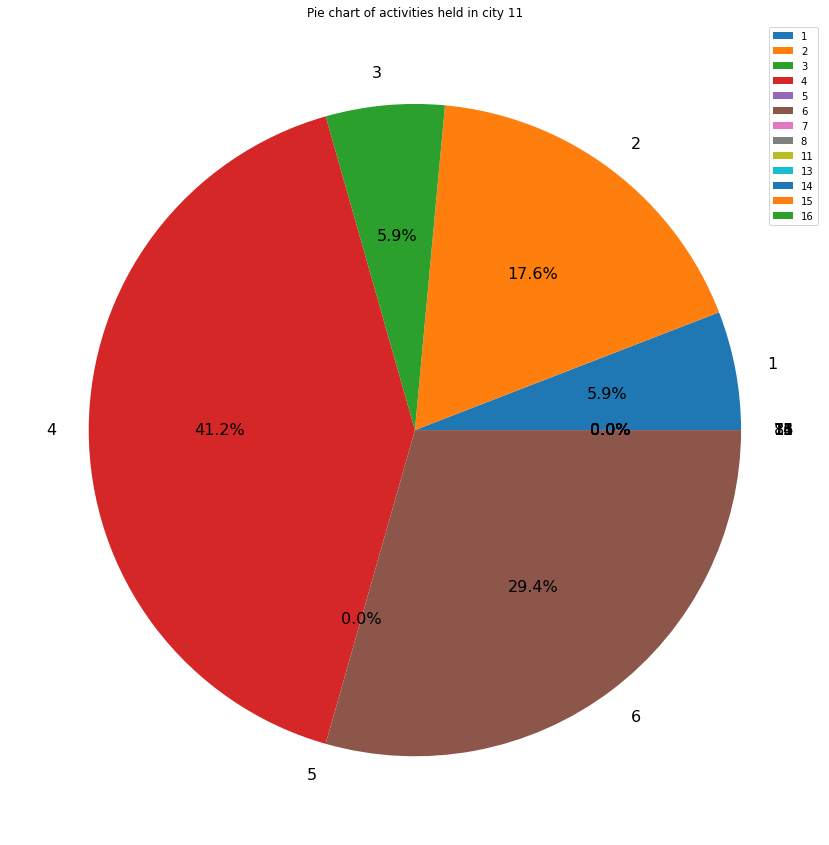

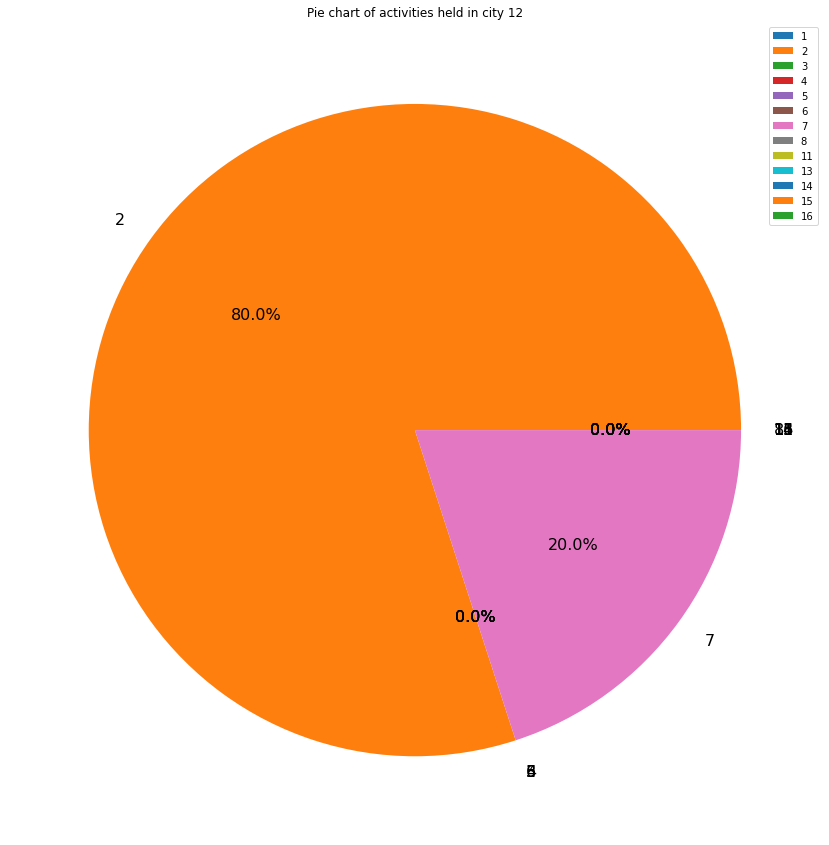

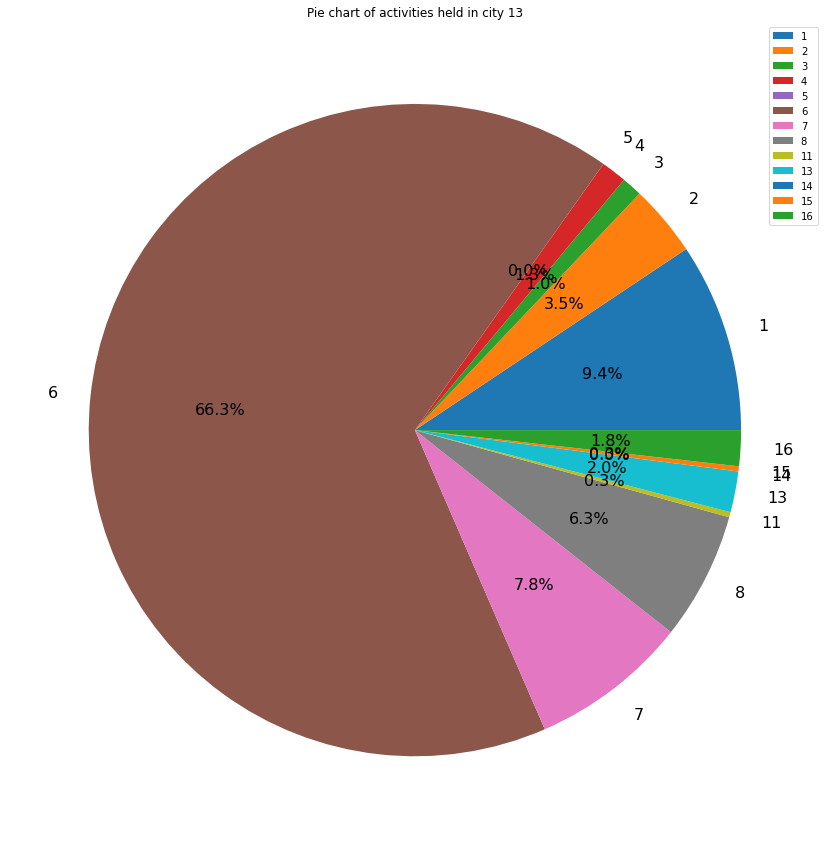

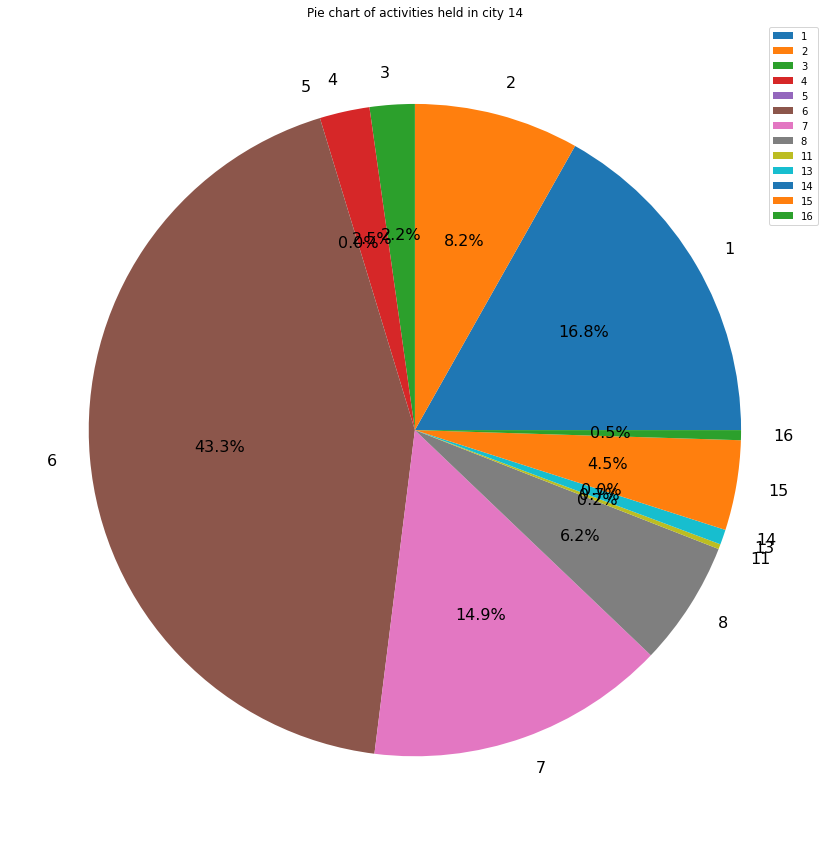

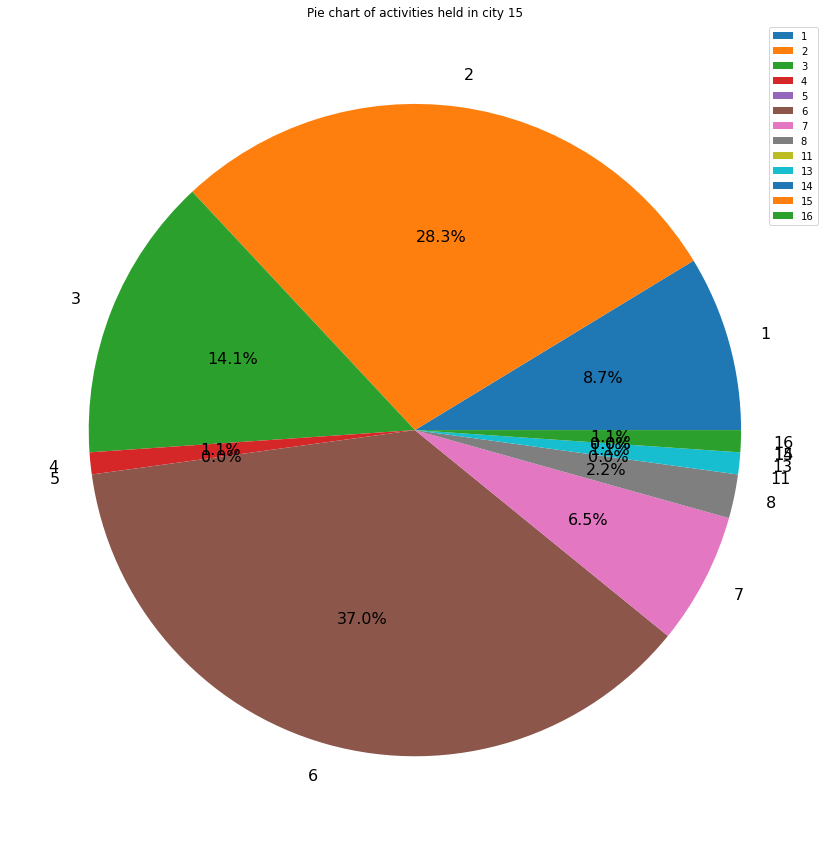

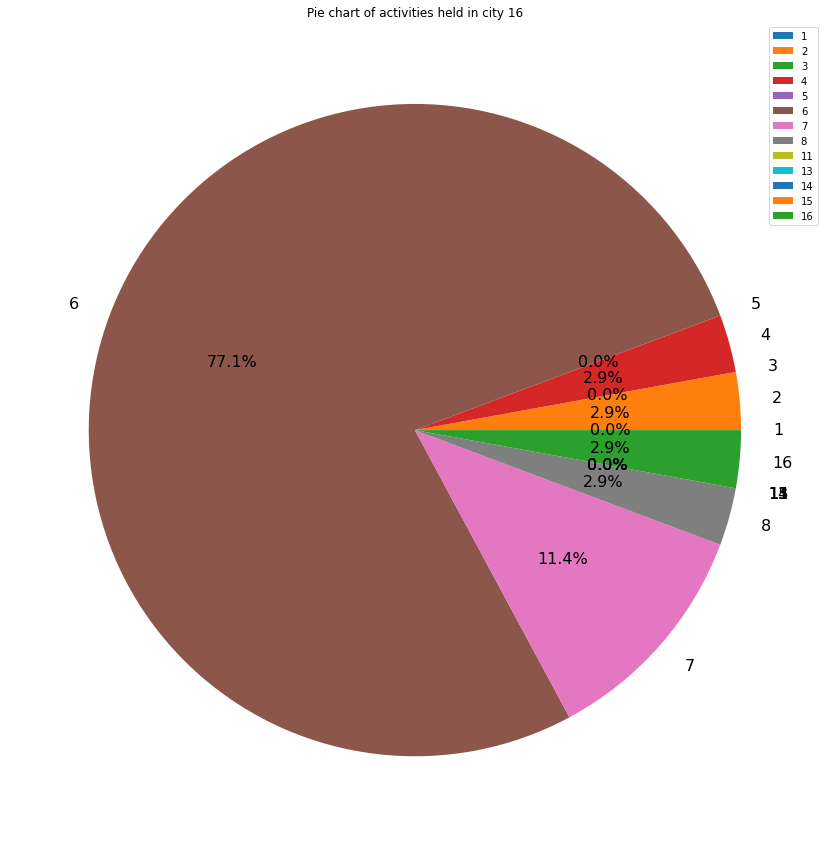

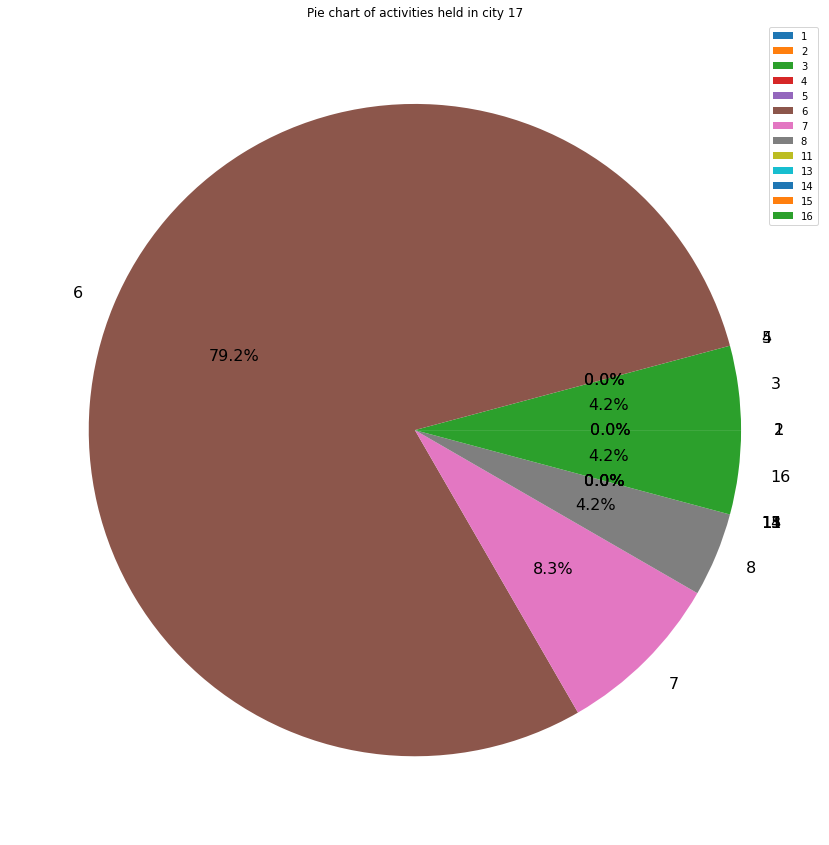

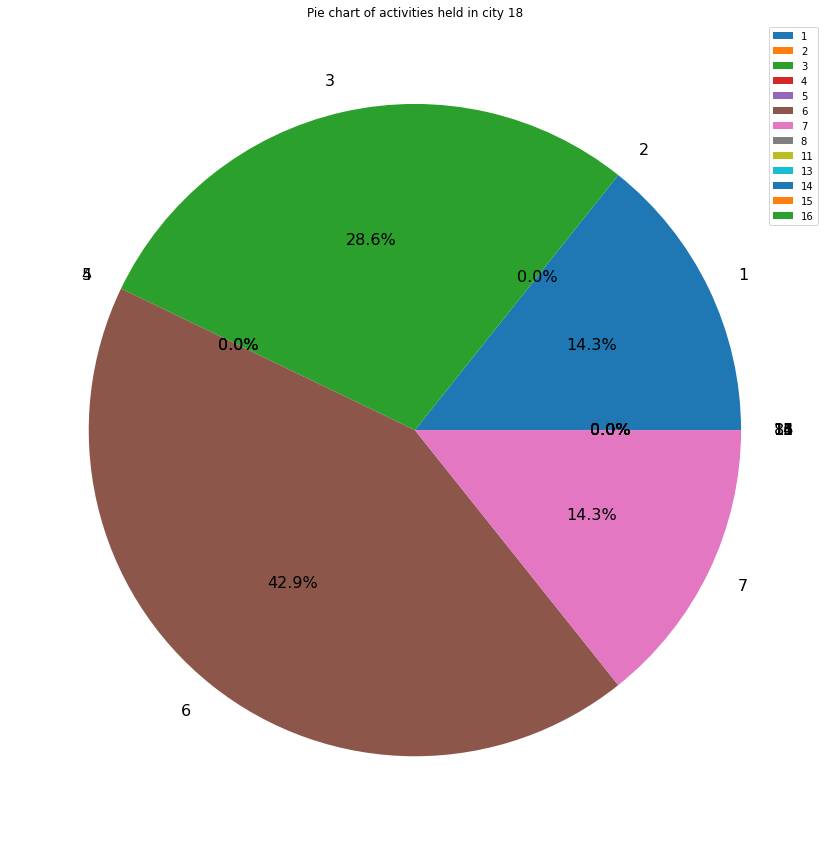

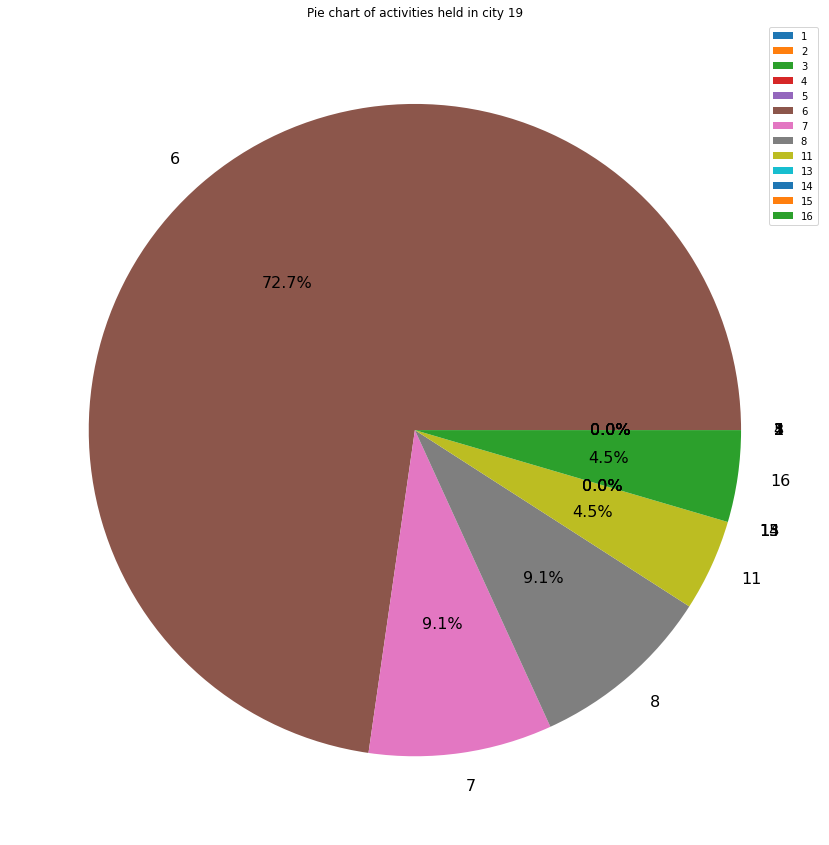

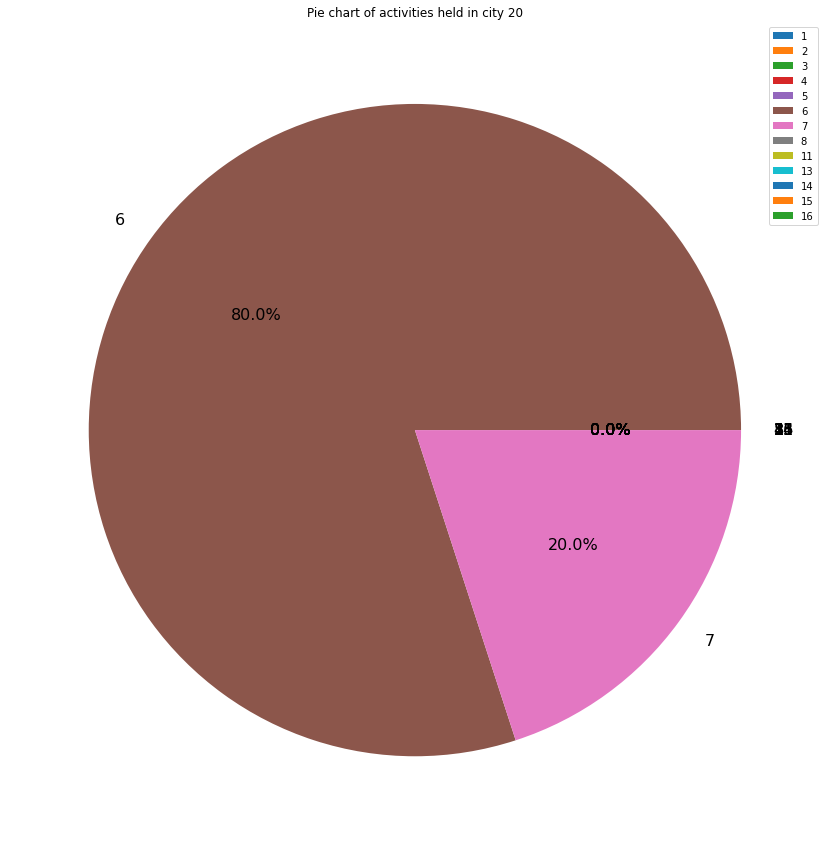

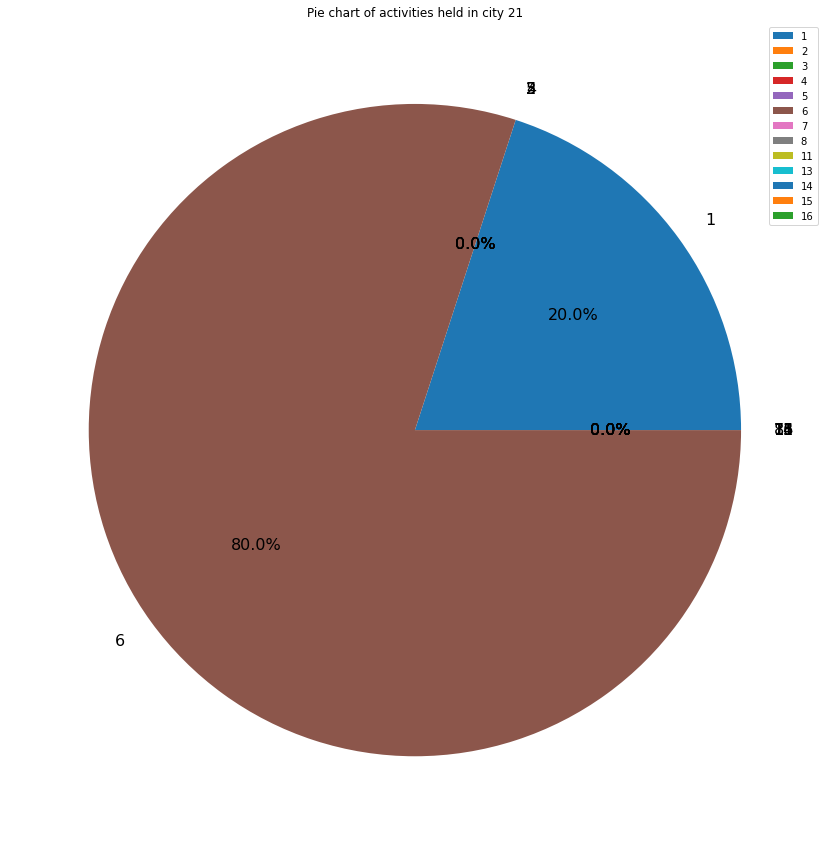

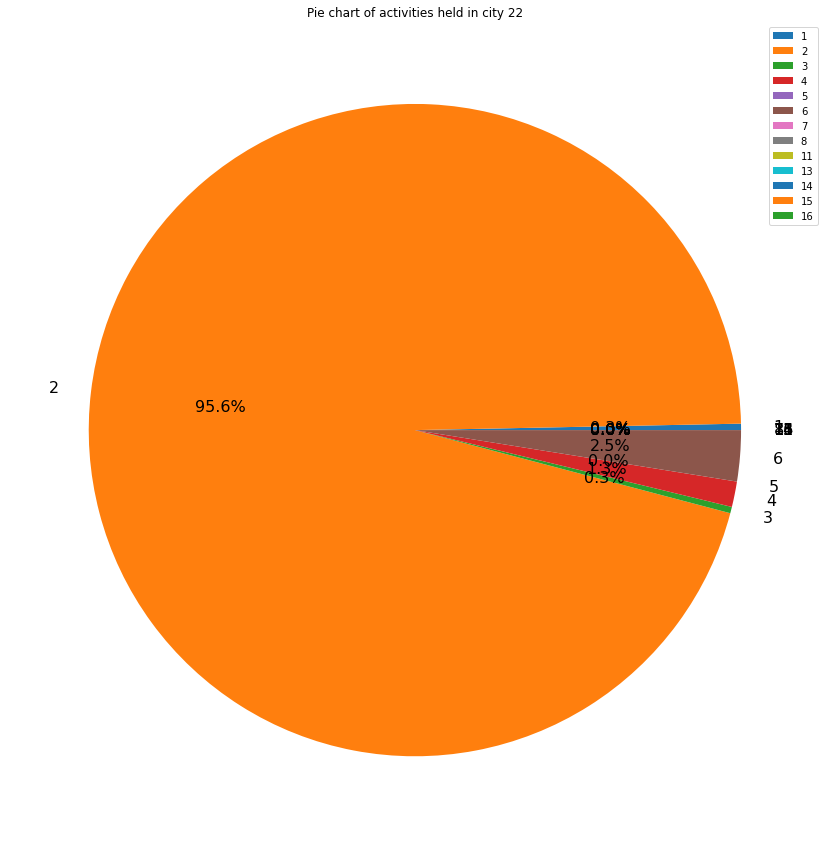

In [106]:
for j, city in enumerate(shows_count.keys()):
        plt.figure(figsize=(30, 15))
        labels = list(shows_count[city].keys())[:-2]
        data = list(shows_count[city].values())[:-2]
        cleaned_labels, cleaned_data = [], []
        for i, label in enumerate(labels):
                if label not in num_categories.keys():
                        pass
                else:
                        cleaned_labels.append(label)
                        cleaned_data.append(data[i])


        plt.pie(cleaned_data,
                labels = cleaned_labels,
                autopct = "%1.1f%%",
                pctdistance = 0.6,
                textprops = {"fontsize" : 16},)
        plt.legend(loc = "best")
        plt.title("Pie chart of activities held in city {}".format(j))

# 各類活動在各縣市舉辦數量及比例
由圓餅圖可得知，category 6 (展覽)在幾乎所有縣市的舉辦比例是最高的，其次是2 (戲曲), 3 (舞蹈), 4 (親子), 7 (講座)等。\
就總量來看，直轄市的舉辦量最高，非展覽的藝文活動亦集中於此。\
其他發現：
* 展覽在新北市最多
* 親子在臺北市最多
* 戲曲線上化最多



# 總結
音樂類型活動(1, 5, 17)過度集中在直轄市舉辦，雖然主題有逐漸契合最大宗展覽的本土化趨勢，但點擊率不甚理想。\
或許可加入親子、講座、線上等元素，提升音樂活動的觸及客群。


